In [1]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt

### Coleta dos dados (já simplificado):

In [12]:
G = ox.graph_from_bbox(2.8765, 2.7503, -60.6267, -60.7805, network_type='drive', infrastructure='way["highway"~"tertiary|primary|secondary"]', clean_periphery=True, simplify=True)

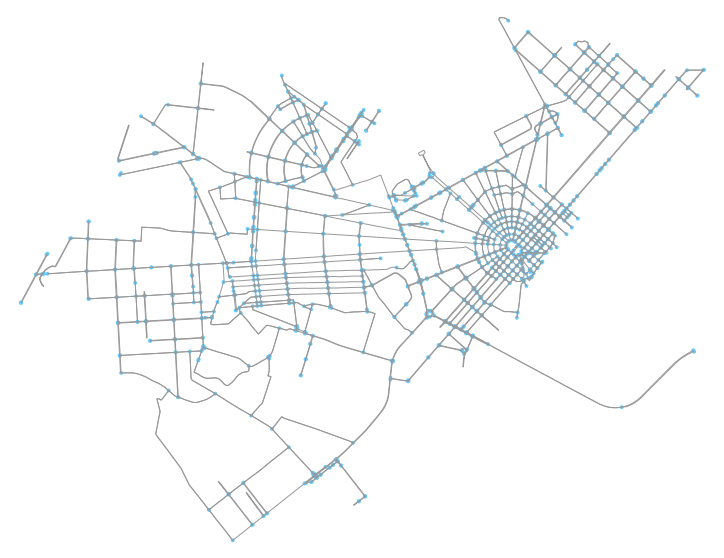

(<Figure size 942.298x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7faeaf039860>)

In [13]:

ox.plot_graph(G, fig_height=10, show=True, save=True, filename='mapaSimplificado', file_format='png')

### Estrutura dos nós:

In [6]:
list(G.nodes(data=True))[0]

(1700543314,
 {'y': 2.7962298,
  'x': -60.6984092,
  'osmid': 1700543314,
  'highway': 'traffic_signals'})

### Estrutura das arestas:

In [7]:
list(G.edges(data=True))[0]

(1700543314,
 1684701725,
 {'osmid': [226403705, 180853203, 180853204, 655088113],
  'oneway': True,
  'ref': 'BR-174',
  'name': 'Avenida Brasil',
  'highway': 'primary',
  'maxspeed': '60',
  'length': 3116.8460000000005,
  'bridge': 'yes',
  'geometry': <shapely.geometry.linestring.LineString at 0x7faeaed2d7b8>})

### Tamanho do grafo:

In [14]:
print(len(G.nodes), len(G.edges))

1481 3005


### Buscando bairro pelos atributos Long,Lati do nó

In [16]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="+")

for node in G.nodes(data=True):
    latLong = str(node[1]['y'])+","+str(node[1]['x'])
    location = geolocator.reverse(latLong)
    print(location.raw['address']['suburb'])

Centro
Jóquei Clube
Centro
Pintolândia
Jardim Tropical
Centro
Pricumã
31 de março
Centro
Paraviana
Calungá
13 de Setembro
13 de Setembro
Mecejana
13 de Setembro
13 de Setembro
13 de Setembro
Caranã
13 de Setembro
Paraviana
Paraviana
Paraviana
Paraviana
Paraviana
13 de Setembro
Calungá
Calungá
Caçari
Caçari
13 de Setembro
Paraviana
Paraviana
Cidade Satélite
Cidade Satélite
Cidade Satélite
Caçari
Paraviana
Estados
Paraviana
União
Paraviana
Paraviana
Paraviana
Paraviana
Caranã
Paraviana
Caçari
Paraviana
Paraviana
Pricumã
União
Pricumã
Caranã
Caçari
Paraviana
Caçari
Caçari


KeyboardInterrupt: 

## Web Scraping

In [6]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import requests

Os dados são coletados do site população.net.br.


A tabela é convertida em um dicionário onde o bairro é a chave e a população é o valor

In [27]:
page = requests.get("http://populacao.net.br/os-maiores-bairros-boa-vista_rr.html")
soup = BeautifulSoup(page.content, 'html.parser')
tabela = soup.find_all('td')

dic = {}
for i in range (0,len(tabela),2):
    dic[tabela[i].get_text()] = tabela[i+1].get_text()

dic

{'Pintolândia': '10.990',
 'Senador Hélio Campos': '10.010',
 'Caranã': '9.931',
 'Cambará': '9.488',
 'Buritis': '9.305',
 'Dr. Silvio Leite': '8.849',
 'Santa Luzia': '8.777',
 'Santa Tereza': '8.118',
 'Alvorada': '7.914',
 'Cauamé': '7.480',
 'Caimbé': '7.447',
 'Boa Vista (demais Setores)': '7.237',
 'Dr. Silvio Botelho': '7.188',
 'Pricumã': '7.051',
 'Tancredo Neves': '7.007',
 'Jóquei Clube': '6.515',
 'São Bento': '6.368',
 'São Vicente': '6.222',
 'Liberdade': '6.199',
 'Jardim Primavera': '6.186',
 'Mecejana': '6.134',
 'Nova Canaã': '6.007',
 'Cidade Satélite': '5.942',
 'Cinturão Verde': '5.907',
 'Raiar de Sol': '5.863',
 'Nova Cidade': '5.708',
 'Jardim Equatorial': '5.594',
 'Centenário': '5.497',
 'Paraviana': '5.443',
 'Asa Branca': '5.256',
 'Centro': '5.140',
 'Laura Moreira': '4.992',
 'Aparecida': '4.860',
 'Treze de Setembro': '4.643',
 'Dos Estados': '4.639',
 'Jardim Floresta': '4.546',
 'Professora Araceli Souto Maior': '4.102',
 'São Francisco': '3.992',
 'Un

### Um exemplo onde a partir de um nó, buscamos a densidade demográfica do bairro

In [30]:
for node in G.nodes(data=True):
    latLong = str(node[1]['y'])+","+str(node[1]['x'])
    location = geolocator.reverse(latLong)
    print(location.raw['address']['suburb'],dic[location.raw['address']['suburb']])

Jóquei Clube 6.515
Centro 5.140
Pintolândia 10.990
Jardim Tropical 2.073
Centro 5.140
Pricumã 7.051


KeyError: '31 de março'

In [5]:
#2.828665, -60.719535
lat = "2.828665"
long = "-60.719535"
url = "https://api.mapbox.com/directions/v5/mapbox/driving-traffic/"+long+"%2C"+lat+"%3B"+long+"%2C"+lat+".json?overview=full&annotations=congestion&access_token=pk.eyJ1IjoiZ2JybGNydmxoIiwiYSI6ImNqd2o2MHk5NTBiNDM0OW4wdmM2aTl4Zm0ifQ.eRC9Qtjm86TIjRVC7zV6Tg"
url

'https://api.mapbox.com/directions/v5/mapbox/driving-traffic/-60.719535%2C2.828665%3B-60.719535%2C2.828665.json?overview=full&annotations=congestion&access_token=pk.eyJ1IjoiZ2JybGNydmxoIiwiYSI6ImNqd2o2MHk5NTBiNDM0OW4wdmM2aTl4Zm0ifQ.eRC9Qtjm86TIjRVC7zV6Tg'

In [53]:
#2.829812, -60.692639
lat = "2.829812"
long = "-60.692639"
url = "https://api.mapbox.com/directions/v5/mapbox/driving-traffic/"+long+"%2C"+lat+"%3B"+long+"%2C"+lat+".json?overview=full&annotations=congestion&access_token=pk.eyJ1IjoiZ2JybGNydmxoIiwiYSI6ImNqd2o2MHk5NTBiNDM0OW4wdmM2aTl4Zm0ifQ.eRC9Qtjm86TIjRVC7zV6Tg"
page = requests.get(url)
soup = BeautifulSoup(page.content, 'html.parser')

soup

{"routes":[{"geometry":"wugPf`mqJ??","legs":[{"annotation":{"congestion":["severe"]},"summary":"","weight":0,"duration":0,"steps":[],"distance":0}],"weight_name":"routability","weight":0,"duration":0,"distance":0}],"waypoints":[{"distance":8.226501485384475,"name":"Avenida Brigadeiro Eduardo Gomes","location":[-60.692675,2.829877]},{"distance":8.226501485384475,"name":"Avenida Brigadeiro Eduardo Gomes","location":[-60.692675,2.829877]}],"code":"Ok","uuid":"cjwj84s0m006v8wpillm6y2uc"}

In [54]:
import json

newDictionary=json.loads(str(soup))
print (newDictionary['waypoints'][0]['name'], newDictionary['routes'][0]['legs'][0]['annotation']['congestion'])

Avenida Brigadeiro Eduardo Gomes ['severe']


In [64]:
for node in G.nodes(data=True):
    lat = str(node[1]['y'])
    long = str(node[1]['x'])
    url = "https://api.mapbox.com/directions/v5/mapbox/driving-traffic/"+long+"%2C"+lat+"%3B"+long+"%2C"+lat+".json?overview=full&annotations=congestion&access_token=pk.eyJ1IjoiZ2JybGNydmxoIiwiYSI6ImNqd2o2MHk5NTBiNDM0OW4wdmM2aTl4Zm0ifQ.eRC9Qtjm86TIjRVC7zV6Tg"
    page = requests.get(url)
    soup = BeautifulSoup(page.content, 'html.parser')
    newDictionary=json.loads(str(soup))
    print (newDictionary['waypoints'][0]['name'], newDictionary['routes'][0]['legs'][0]['annotation']['congestion'])

Avenida Rio Mucajaí ['unknown']
Avenida Capitão Júlio Bezerra ['severe']
Avenida Nazaré Filgueiras ['unknown']
Avenida Parque Céu Azul ['unknown']
Rua Professor Agnelo Bitencourt ['unknown']
Via das Flores ['unknown']
Avenida Brigadeiro Eduardo Gomes ['severe']
Avenida Benjamin Constant ['unknown']
Avenida Luis Canuto Chaves ['unknown']
Avenida Benjamin Constant ['unknown']
Avenida General Sampaio ['unknown']
Avenida General Sampaio ['unknown']
Avenida Venezuela ['unknown']
Avenida Monte Castelo ['unknown']
 ['unknown']
 ['unknown']
Avenida João Liberato ['unknown']
Avenida General Sampaio ['unknown']
Avenida Parque Cauamé ['unknown']
Rua Sucupira ['unknown']
Rua Augusto César Luitgards Moura ['unknown']
Rua Claudionor Freire ['unknown']
Rua Pau-rainha ['unknown']
Avenida das Guianas ['unknown']
Avenida das Guianas ['unknown']
Avenida das Guianas ['unknown']
Rua do Genipapeiro ['unknown']
Avenida da Pitombeira ['unknown']
Avenida General Sampaio ['unknown']
Rua Angico ['unknown']
Rua S

Avenida General Ataíde Teive ['unknown']
Avenida Felinto Barbosa Monteiro ['unknown']
Avenida Getúlio Corrêa Pinho ['unknown']
Avenida Solstícios ['unknown']
Rua Francisco Anacleto da Silva ['unknown']
Avenida Solstícios ['unknown']
Avenida Centenário ['unknown']
Avenida Roma ['unknown']
Avenida João Alencar ['unknown']
Avenida Solstícios ['unknown']
Rua Deco Fonteles ['unknown']
Rua Estrela D'Alva ['unknown']
Rua Izidio Galdino da Silva ['unknown']
Rua Jerusalém ['unknown']
Avenida Santo Antônio ['unknown']
 ['unknown']
Rua Horácio Mardel de Magalhães ['severe']
Rua Nascente ['unknown']
Avenida Tambaú ['unknown']
Avenida Brasil ['unknown']
Rua Nagib Eluan ['unknown']
Rua Nordeste ['unknown']
Rua Parque Industrial ['unknown']
Rua Izidio Galdino da Silva ['unknown']
Avenida Nossa Senhora de Nazaré ['unknown']
Avenida Nossa Senhora de Nazaré ['unknown']
 ['severe']
Avenida Brasil ['unknown']
Rua Parque Industrial ['severe']
Rua Manoel Felipe ['unknown']
Rua Major Manoel Correia ['unknown

KeyboardInterrupt: 

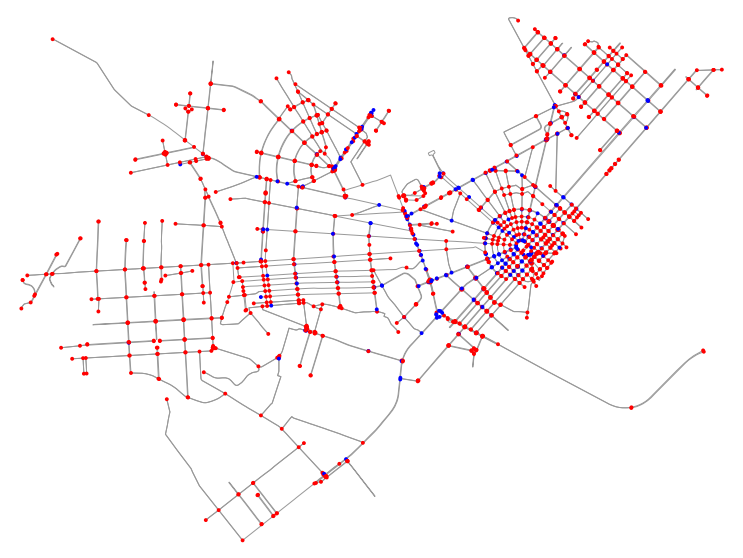

In [76]:
nc = []
for node in G.nodes(data=True):
    lat = str(node[1]['y'])
    long = str(node[1]['x'])
    url = "https://api.mapbox.com/directions/v5/mapbox/driving-traffic/"+long+"%2C"+lat+"%3B"+long+"%2C"+lat+".json?overview=full&annotations=congestion&access_token=pk.eyJ1IjoiZ2JybGNydmxoIiwiYSI6ImNqd2o2MHk5NTBiNDM0OW4wdmM2aTl4Zm0ifQ.eRC9Qtjm86TIjRVC7zV6Tg"
    page = requests.get(url)
    soup = BeautifulSoup(page.content, 'html.parser')
    newDictionary=json.loads(str(soup))
    if newDictionary['routes'][0]['legs'][0]['annotation']['congestion'][0] == 'unknown':
        nc.append('r')
    else:
        nc.append('b')
fig, ax = ox.plot_graph(G, show=True, fig_height=10, node_color=nc, node_zorder=3)

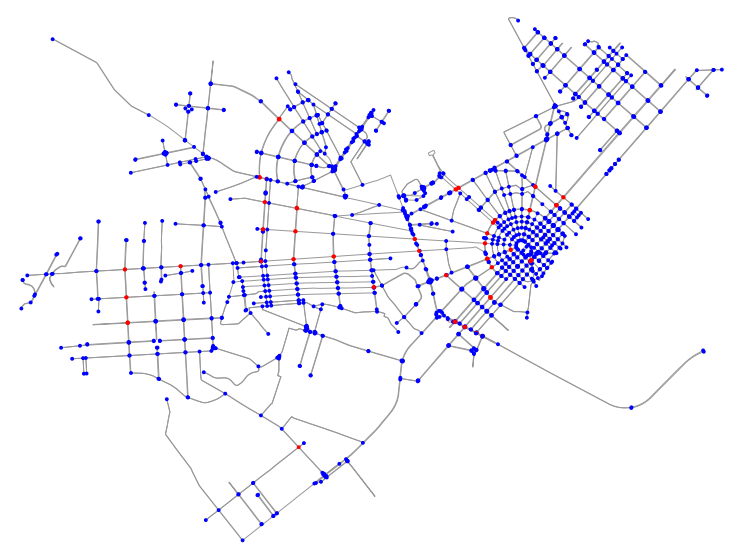

In [75]:
nc = []
for node in G.nodes(data=True):
    if 'highway' in node[1].keys():
        nc.append('r')
    else:
        nc.append('b')
fig, ax = ox.plot_graph(G, show=True, fig_height=10, node_color=nc, node_zorder=3)